In [1]:
library(dynlm)
library(car)
library(carData)
library(zoo)
library(xts)
library(tsbox)
library(tseries)
library(forecast)
library(astsa)
library(gvlma)
library(hwwntest)

Warning message:
"package 'dynlm' was built under R version 3.5.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.5.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'car' was built under R version 3.5.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.5.3"Warning message:
"package 'xts' was built under R version 3.5.3"Warning message:
"package 'tsbox' was built under R version 3.5.3"Warning message:
"package 'tseries' was built under R version 3.5.3"Warning message:
"package 'forecast' was built under R version 3.5.3"Warning message:
"package 'astsa' was built under R version 3.5.3"
Attaching package: 'astsa'

The following object is masked from 'package:forecast':

    gas

Warning message:
"package 'gvlma' was built under R version 3.5.2"Warning message:
"package 'hwwntest' was built under R version 3.5.3

In [2]:
# Making an xts object for the data
# Mumbai

mumbai <- as.data.frame(read.csv("../../Data/DistTimeSeries/Cases/Delhi.csv", sep = ","))
mumbai$ï..Date <- as.Date(mumbai$ï..Date , format = "%d-%b-%y")
colnames(mumbai) <- c("Date", "NewCases", "TotalCases", "Lockdown", "Temperature", "RH")
mumbai.xts <- xts(mumbai, order.by=mumbai$Date)
mumbai.xts <- mumbai.xts[, colnames(mumbai.xts) != "Date"]
# mumbai

In [28]:
# We make date with zero cases to 1 case
mumbai.xts$NewCases <- replace(mumbai.xts$NewCases, (as.numeric(mumbai.xts$NewCases) == 0), "1")

# Making new dataset after 20-Mar
startDate <- as.Date("25-Mar-20" , format = "%d-%b-%y")
endDate <- as.Date("27-Apr-20" , format = "%d-%b-%y")

newMumbai.xts <- subset(mumbai.xts, index(mumbai.xts)>=startDate)
newMumbai.xts <- subset(newMumbai.xts, index(newMumbai.xts)<=endDate)
# mumbai.xts$NewCases

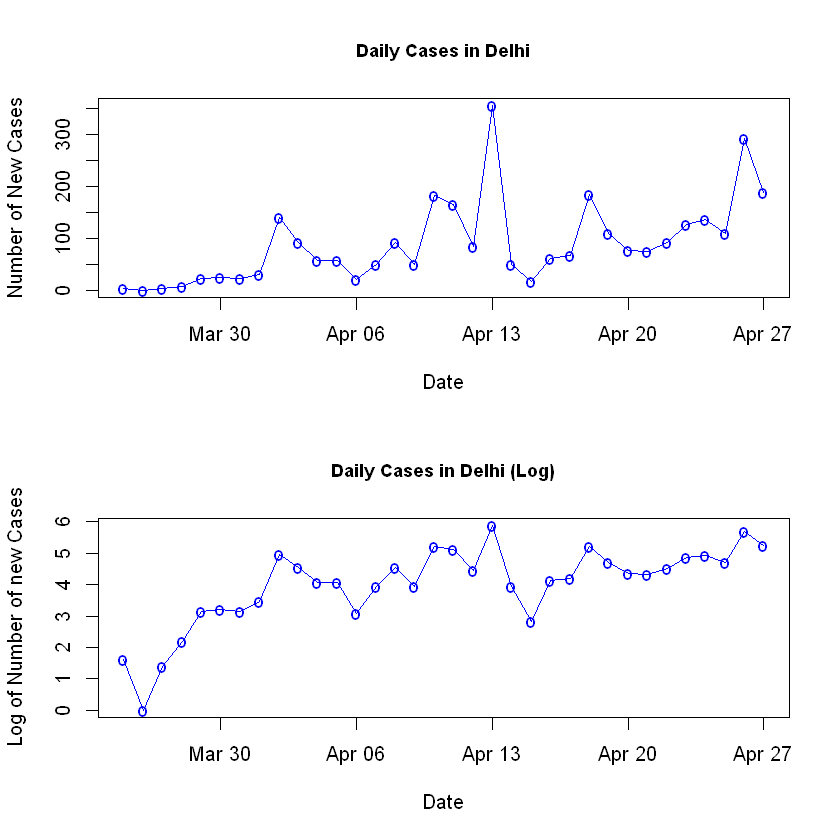

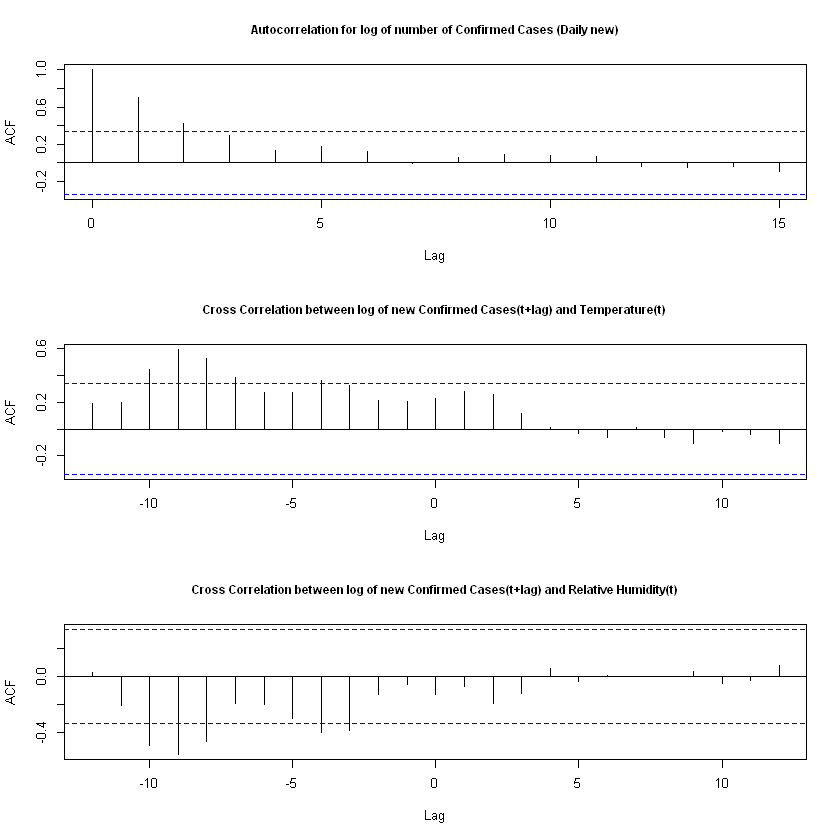

In [29]:
# Plots for Daily new Cases

par(mfrow = c(2,1), cex.main=0.9) # set up the graphics
plot(index(newMumbai.xts), newMumbai.xts$NewCases, type="o", col="blue", pch="o", lty=1, main="Daily Cases in Delhi", ylab="Number of New Cases", xlab="Date")
plot(index(newMumbai.xts), log(as.numeric(newMumbai.xts$NewCases)), type="o", col="blue", pch="o", lty=1, main="Daily Cases in Delhi (Log)", ylab="Log of Number of new Cases", xlab="Date")

par(mfrow = c(3,1), cex.main=0.9)
acf(log(as.numeric(newMumbai.xts$NewCases)), main="Autocorrelation for log of number of Confirmed Cases (Daily new)")
ccf(log(as.numeric(newMumbai.xts$NewCases)), as.numeric(newMumbai.xts$Temperature), main="Cross Correlation between log of new Confirmed Cases(t+lag) and Temperature(t)")
ccf(log(as.numeric(newMumbai.xts$NewCases)), as.numeric(newMumbai.xts$RH), main="Cross Correlation between log of new Confirmed Cases(t+lag) and Relative Humidity(t)")


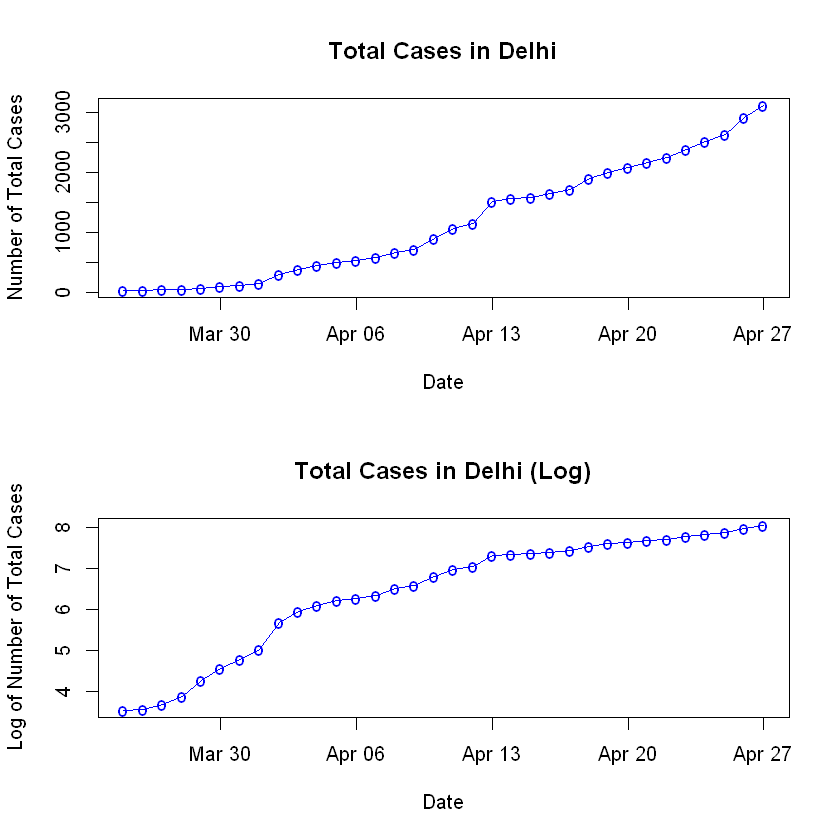

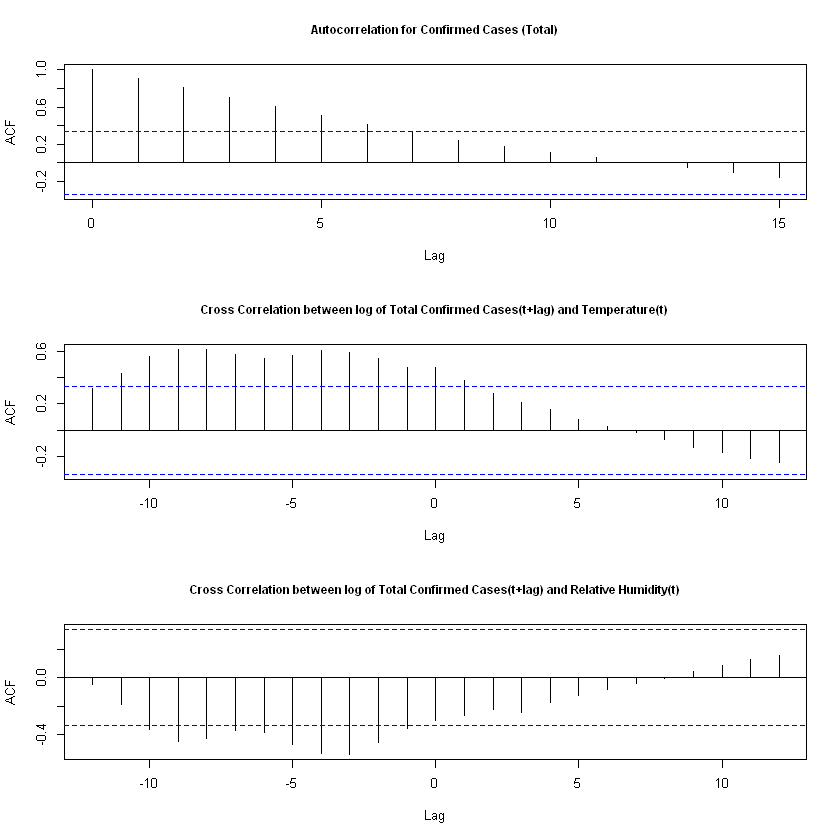

In [30]:
# Plots for Total Cases

par(mfrow = c(2,1)) # set up the graphics
plot(index(newMumbai.xts), newMumbai.xts$TotalCases, type="o", col="blue", pch="o", lty=1, main="Total Cases in Delhi", ylab="Number of Total Cases", xlab="Date")
plot(index(newMumbai.xts), log(as.numeric(newMumbai.xts$TotalCases)), type="o", col="blue", pch="o", lty=1, main="Total Cases in Delhi (Log)", ylab="Log of Number of Total Cases", xlab="Date")

par(mfrow = c(3,1), cex.main=0.9)
acf(log(as.numeric(newMumbai.xts$TotalCases)), main="Autocorrelation for Confirmed Cases (Total)")
ccf(log(as.numeric(newMumbai.xts$TotalCases)), as.numeric(newMumbai.xts$Temperature), cex=0.25, main="Cross Correlation between log of Total Confirmed Cases(t+lag) and Temperature(t)")
ccf(log(as.numeric(newMumbai.xts$TotalCases)), as.numeric(newMumbai.xts$RH), main="Cross Correlation between log of Total Confirmed Cases(t+lag) and Relative Humidity(t)")

In [31]:
# Making time squared trend to be fit
# Adding plus 1 kyunki baadme vo subtract ho jaayega
timeTrend_2 <- (1:length(index(newMumbai.xts))) ^2  
timeTrend <- (1:length(index(newMumbai.xts)))

mumbai.reg.data <- data.frame(log(as.numeric(coredata(newMumbai.xts$NewCases))),
                              as.numeric(coredata(newMumbai.xts$Temperature)), as.numeric(coredata(newMumbai.xts$RH)),   
                              timeTrend, timeTrend_2)
colnames(mumbai.reg.data) <- c("TimeSeries", "Temperature", "RH", "timeTrend", "timeTrend_2")

# mumbai.reg.data.matrix <- data.matrix(mumbai.reg.data)
# mumbai.reg.data.xts <- xts(mumbai.reg.data, order.by=index(newMumbai.xts))
mumbai.reg.data.ts <- as.ts(mumbai.reg.data, order.by=index(newMumbai.xts))
# index(mumbai.reg.data.zoo)
mumbai.reg.data.ts 

TimeSeries,Temperature,RH,timeTrend,timeTrend_2
1.609438,24,37,1,1
0.000000,27,34,2,4
1.386294,25,38,3,9
2.197225,24,49,4,16
3.135494,22,57,5,25
3.218876,23,60,6,36
3.135494,25,47,7,49
3.465736,26,37,8,64
4.948760,25,38,9,81
4.532599,23,53,10,100



Time series regression with "ts" data:
Start = 2, End = 34

Call:
dynlm(formula = TimeSeries ~ timeTrend + timeTrend_2 + L(Temperature, 
    1) + L(RH, 1), data = mumbai.reg.data.ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8230 -0.4815  0.1383  0.3527  1.5029 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -6.870061   3.284862  -2.091  0.04568 *  
timeTrend          0.340213   0.068839   4.942 3.25e-05 ***
timeTrend_2       -0.007709   0.002112  -3.650  0.00106 ** 
L(Temperature, 1)  0.230671   0.099825   2.311  0.02843 *  
L(RH, 1)           0.050837   0.019785   2.570  0.01580 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7482 on 28 degrees of freedom
Multiple R-squared:  0.6698,	Adjusted R-squared:  0.6226 
F-statistic:  14.2 on 4 and 28 DF,  p-value: 1.9e-06


[1] 81.07991

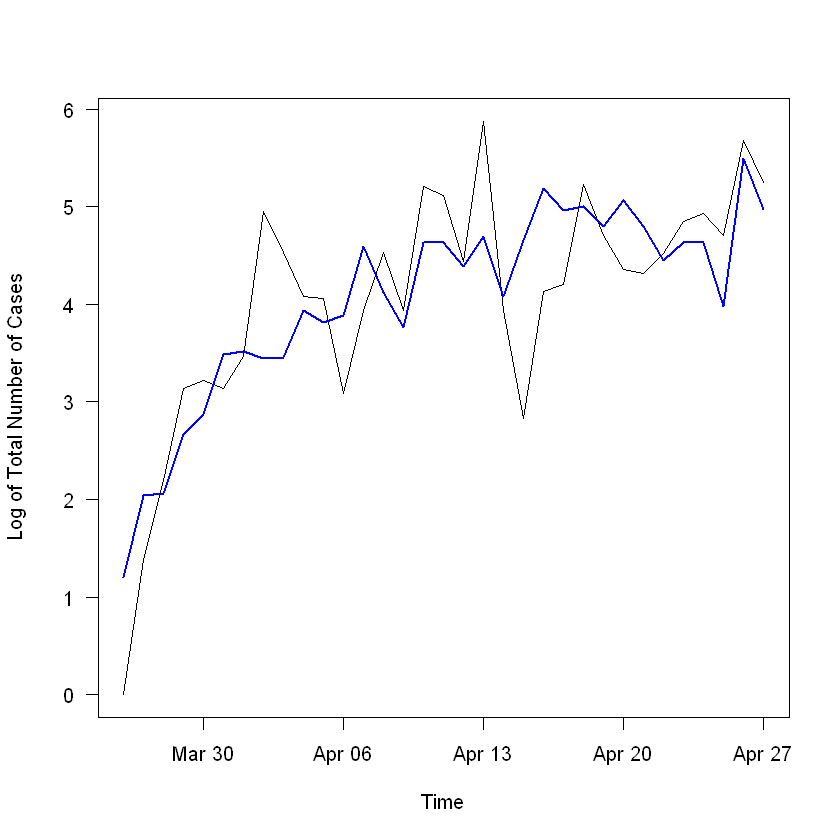

In [32]:
dataTimeSeries <- log(as.numeric(newMumbai.xts$NewCases))
numRows <- length(dataTimeSeries)
start = 2
detrended <- dynlm(TimeSeries ~ timeTrend+timeTrend_2+L(Temperature,1)+L(RH,1), data=mumbai.reg.data.ts)
summary(detrended)
prediction <- predict(detrended)
plot(index(newMumbai.xts)[start:numRows], dataTimeSeries[start:numRows], "l", las=1, xlab="Time", ylab="Log of Total Number of Cases")
lines(prediction~index(newMumbai.xts)[start:numRows], col="blue", lwd=2)
# plot(residuals(detrended))
# shapiro.test(detrended$residuals)
AIC(detrended)

In [33]:
# Forecasting
# Predicting for 26th, 27th and 28th
time <- c(35)
timeSquared <- time*time

# For 25th, 26th and 27th
temperature <- c(32)
RelHum <- c(45)
data <- data.frame(temperature, RelHum, time, timeSquared)
colnames(data) <- c("Temperature", "RH", "timeTrend", "timeTrend_2")
data
pred <- predict(detrended, newdata = data)
varianceError <- var(detrended$residuals)
varianceError <- varianceError/2
varianceError
exp(pred)
pred <- pred+varianceError
finalPred <- exp(pred)
finalPred
initial <- exp(dataTimeSeries[32])
initial

Temperature,RH,timeTrend,timeTrend_2
32,45,35,1225


[1] 0.2448959

1 
192.9744

1 
246.5225

[1] 111

In [34]:
# par(mfrow = c(2,1))
# acf(detrended$residuals, main="Autocorrelation between residuals")
# pacf(detrended$residuals, main="Partial autocorrelation between residuals")

In [35]:
# Test for white noise
bartlettB.test(detrended$residuals)


	Bartlett B Test for white noise

data:  
= 1.3438, p-value = 0.05401


In [36]:
nrows <- length(detrended$residuals)
residualTimeSeries <- detrended$residuals
fit <- auto.arima(residualTimeSeries, method="ML")
fit

Series: residualTimeSeries 
ARIMA(0,0,1) with zero mean 

Coefficients:
         ma1
      0.9667
s.e.  0.1738

sigma^2 estimated as 0.2753:  log likelihood=-26.35
AIC=56.69   AICc=57.09   BIC=59.68